In [1]:
from data_prep import *

In [2]:
X_train, y_train, X_val, y_val, X_test, y_test = get_dataset()

The shape of input data for training model, X_train is torch.Size([17531, 31, 17])
Shape of X_train: torch.Size([17531, 31, 17])
Shape of y_train before view: torch.Size([17700])
The shape of input data for training model, X_train is torch.Size([14024, 31, 17])
The shape of input data for training model, y_train is torch.Size([14024, 1])
The shape of input data for validation model, X_val is torch.Size([3507, 31, 17])
The shape of input data for validation model, y_val is torch.Size([3507, 1])
The shape of input data for testing model, X_test is torch.Size([100, 31, 17])
The shape of input data for testing model, y_test is torch.Size([100, 1])


In [3]:
device = torch.device("cpu")

In [4]:
# convert y_train , y_val and y_test to binary values if <30 then 1 else 0
y_train = (y_train < 30).float()
y_val = (y_val < 30).float()
y_test = (y_test < 30).float()

In [5]:
import torch.nn.functional as F
import torch.nn as nn
import torch

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            torch.nn.Conv2d(  
                in_channels=1,  
                out_channels=20,  
                kernel_size=3,  
                stride=1, 
                padding=2  
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.fc = nn.Linear(20*16*9, 1)  # Adjusted to output a single value

    def forward(self, x):
        x = torch.unsqueeze(x, dim=1)
        x = self.conv1(x)
        x = x.view(x.size(0), -1)  
        x = self.fc(x)
        x = torch.sigmoid(x)  # Apply sigmoid activation
        return x

torch.manual_seed(114514)
model = CNN().to(device)
criterion = nn.BCELoss()  # Use Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.0225433835001291)
savepth = "cnn"



In [12]:
num_epochs = 100
batch_size = 256
hidden_size = 50
hidden_dim2 = 25
input_size = 17

In [6]:
from matplotlib import pyplot as plt

In [7]:
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score,precision_score,recall_score

Epoch 0, train loss: 0.14987115561962128 , val_loss: 0.17807555198669434, val_acc: 0.9272882805816938, val_precision: 0.9237875288683602
Epoch 1, train loss: 0.1480587124824524 , val_loss: 0.13505756855010986, val_acc: 0.9421157684630739, val_precision: 0.8150375939849624
Epoch 2, train loss: 0.13317924737930298 , val_loss: 0.11686068773269653, val_acc: 0.9506700883946393, val_precision: 0.8417047184170472
Epoch 3, train loss: 0.1244729682803154 , val_loss: 0.10280780494213104, val_acc: 0.9563729683490163, val_precision: 0.8580152671755725
Epoch 4, train loss: 0.10929909348487854 , val_loss: 0.09011659026145935, val_acc: 0.9603649843170802, val_precision: 0.8744186046511628
Epoch 5, train loss: 0.08506503701210022 , val_loss: 0.08175347745418549, val_acc: 0.9674935842600513, val_precision: 0.9440559440559441
Epoch 6, train loss: 0.07420843839645386 , val_loss: 0.07439713180065155, val_acc: 0.9700598802395209, val_precision: 0.9480069324090121
Epoch 7, train loss: 0.06854971498250961 , 

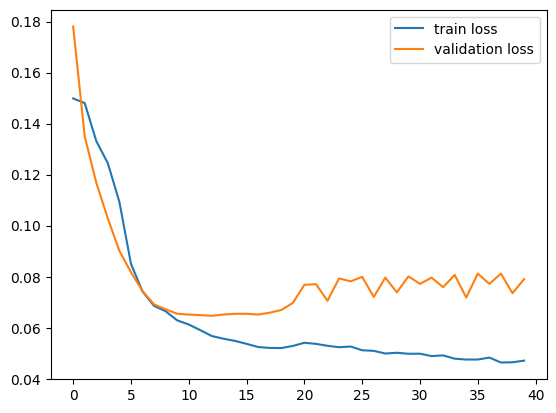

In [8]:
num_epochs = 40
batch_size = 256
model.train()
train_loss = []
val_losses = []
for epoch in range(num_epochs):   
    model.train()
    val_predictions_list = []
    for i in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        indices = range(i, min(i+batch_size, len(X_train)))
        X_batch = X_train[indices].to(device)
        out = model(X_batch)
        loss = criterion(out, y_train[indices].to(device))        
        loss.backward()
        optimizer.step()
    model.eval()
    val_out = model(X_val.to(device))
    val_loss = criterion(val_out, y_val.to(device)).item()
    val_acc = accuracy_score(y_val.cpu().detach().numpy(), val_out.cpu().detach().numpy().round())
    val_precision = precision_score(y_val.cpu().detach().numpy(), val_out.cpu().detach().numpy().round())
    train_loss.append(loss.item())
    print(f'Epoch {epoch}, train loss: {loss.item()} , val_loss: {val_loss}, val_acc: {val_acc}, val_precision: {val_precision}')
    val_losses.append(val_loss)
# plot the loss on the training    
plt.plot(train_loss, label='train loss')
plt.plot(val_losses, label='validation loss')
plt.legend()
plt.show()

In [9]:
model.eval()    
test_predictions = model(X_test.to(device))
# find the accuracy, precision, recall, f1 score and roc_auc score for the test set
test_acc = accuracy_score(y_test.cpu().detach().numpy(), test_predictions.cpu().detach().numpy().round())
test_precision = precision_score(y_test.cpu().detach().numpy(), test_predictions.cpu().detach().numpy().round())
test_recall = recall_score(y_test.cpu().detach().numpy(), test_predictions.cpu().detach().numpy().round())
test_f1 = f1_score(y_test.cpu().detach().numpy(), test_predictions.cpu().detach().numpy().round())
test_roc_auc = roc_auc_score(y_test.cpu().detach().numpy(), test_predictions.cpu().detach().numpy())
print(f'test_acc: {test_acc}, test_precision: {test_precision}, test_recall: {test_recall}, test_f1: {test_f1}, test_roc_auc: {test_roc_auc}')


test_acc: 0.95, test_precision: 0.8333333333333334, test_recall: 1.0, test_f1: 0.9090909090909091, test_roc_auc: 0.9978666666666667
